In [34]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# pytorch stuff
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.nn import functional as F

In [3]:
# Define an arbitrary vocab size and embedding dimesnion
vocab_size = 4000
embed_dim = int(np.sqrt(vocab_size))
print(f'Vocabulary Size: {vocab_size}')
print(f'Embedding Dimension: {embed_dim}')

Vocabulary Size: 4000
Embedding Dimension: 63


In [25]:
# Define nn.Embedding and nn.Linear
embedding = nn.Embedding(vocab_size, embed_dim)
linear = nn.Linear(embed_dim, vocab_size)
embedding.weight.shape, linear.weight.shape

(torch.Size([4000, 63]), torch.Size([4000, 63]))

In [26]:
# Get the embedding matrix for an arbitrary token
token = torch.tensor([23])
embedding_matrix = embedding(token)
print('Embedding Matrix Shape', embedding_matrix.shape)

linear_matrix = linear.weight[token]
print(linear_matrix.shape)

Embedding Matrix Shape torch.Size([1, 63])
torch.Size([1, 63])


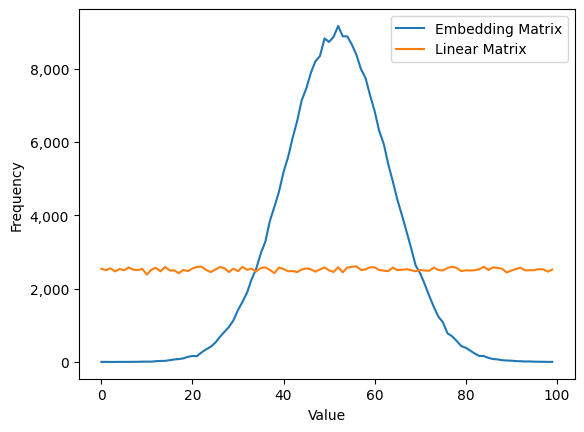

In [38]:
# Plot histograms for both the matrices
hist_embeddings, bin_edges_embeddings = np.histogram(embedding.weight.flatten().detach(), bins=100)

# Now, let's also plot the histogram for the linear layer's weights
hist_linear, bin_edges_linear = np.histogram(linear.weight.flatten().detach(), bins=100)

plt.plot(hist_embeddings, label='Embedding Matrix')
plt.plot(hist_linear, label='Linear Matrix')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Observation:
- Weigths of nn.Linear are randomly distributed during initialization with small variance
- Weights of nn.Embedding are normally distributed (standard distrbution ~ 1)
- nn.Embedding simply creates a weight matrix based on the inputs (vocab_size x embedding_dimension)
- nn.Linear internally multiplies the inputs with the weights created during instantiation of the class

In [40]:
linear.weight.std(), embedding.weight.std()

(tensor(0.0727, grad_fn=<StdBackward0>),
 tensor(1.0006, grad_fn=<StdBackward0>))